In [116]:
%matplotlib inline

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [51]:
balanced_graph_1 = nx.Graph()
balanced_graph_2 = nx.Graph()
balanced_graph_3 = nx.Graph()
balanced_graph_4 = nx.Graph()


balanced_graph_1.add_edges_from([ ("a", "b", { "sign": +1 }),
                                 ("c", "b", { "sign": +1 }),
                                 ("a", "c", { "sign": +1 })])

balanced_graph_2.add_edges_from([ ("a", "b", { "sign": +1 }),
                                 ("c", "b", { "sign": -1 }),
                                 ("a", "c", { "sign": -1 })])

balanced_graph_3.add_edges_from([ ("a", "b", { "sign": -1 }),
                                 ("c", "b", { "sign": +1 }),
                                 ("a", "c", { "sign": -1 })])

balanced_graph_4.add_edges_from([ ("a", "b", { "sign": -1 }),
                                 ("c", "b", { "sign": -1 }),
                                 ("a", "c", { "sign": +1 })])

In [52]:
unbalanced_graph_1 = nx.Graph()
unbalanced_graph_2 = nx.Graph()
unbalanced_graph_3 = nx.Graph()
unbalanced_graph_4 = nx.Graph()

unbalanced_graph_1.add_edges_from([ ("a", "b", { "sign": +1 }),
                                 ("c", "b", { "sign": +1 }),
                                 ("a", "c", { "sign": -1 })])

unbalanced_graph_2.add_edges_from([ ("a", "b", { "sign": +1 }),
                                 ("c", "b", { "sign": -1 }),
                                 ("a", "c", { "sign": +1 })])

unbalanced_graph_3.add_edges_from([ ("a", "b", { "sign": -1 }),
                                 ("c", "b", { "sign": +1 }),
                                 ("a", "c", { "sign": +1 })])

unbalanced_graph_4.add_edges_from([ ("a", "b", { "sign": -1 }),
                                 ("c", "b", { "sign": -1 }),
                                 ("a", "c", { "sign": -1 })])

In [53]:
unbalanced_graph_5 = nx.Graph()

unbalanced_graph_5.add_edges_from([ ("a", "b", { "sign": -1 }),
                                   ("a", "e", { "sign": -1 }),
                                   ("b", "e", { "sign": +1 }),
                                   ("a", "d", { "sign": -1 }),
                                   ("d", "e", { "sign": +1 }),
                                   ("b", "c", { "sign": -1 }),
                                   ("d", "c", { "sign": +1 })])

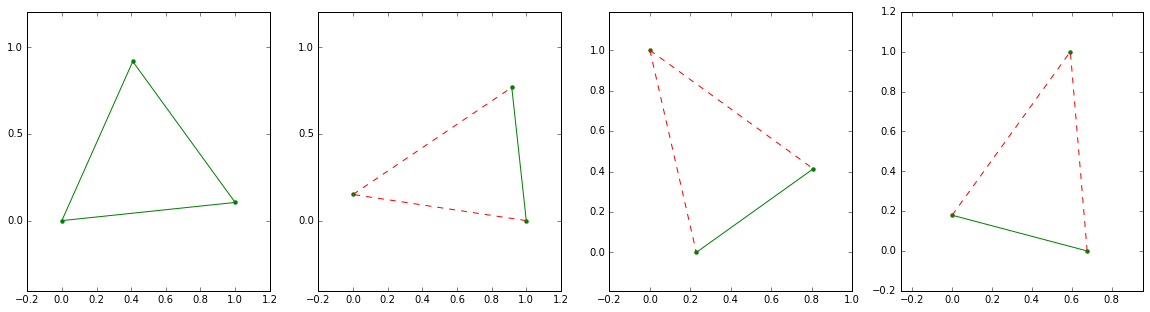

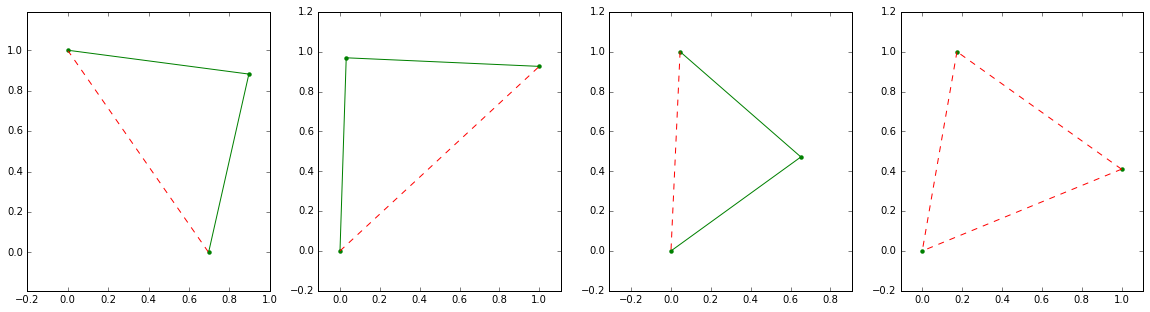

In [179]:
def draw_signed_graph(g, ax):
  pos = nx.spring_layout(g, weight="sign", iterations=50, k=1)
  x,y = zip(*pos.values())
  
  ax.axis('equal')

  styles = { +1: { "color": "g", "ls": "-"},
            -1: { "color": "r", "ls": "--"}}
  
  
  # plot edges
  for e in g.edges(data=True):
    ls = styles[e[2]["sign"]]["ls"]
    color = styles[e[2]["sign"]]["color"]

    ax.plot([ pos[e[0]][0], pos[e[1]][0]], [ pos[e[0]][1], pos[e[1]][1] ], ls=ls, color=color)
  
  # plot nodes
  ax.scatter(x,y, lw=0, color="g")
  
  #nx.draw(g, pos)

  return ax

f, ax = plt.subplots(1,4, figsize=(20,5)) 
map(lambda x: draw_signed_graph(x[0],x[1]), zip([balanced_graph_1, balanced_graph_2, balanced_graph_3, balanced_graph_4], ax));
plt.show()

f, ax = plt.subplots(1,4, figsize=(20,5)) 
map(lambda x: draw_signed_graph(x[0],x[1]), zip([unbalanced_graph_1, unbalanced_graph_2, unbalanced_graph_3, unbalanced_graph_4], ax));
plt.show()

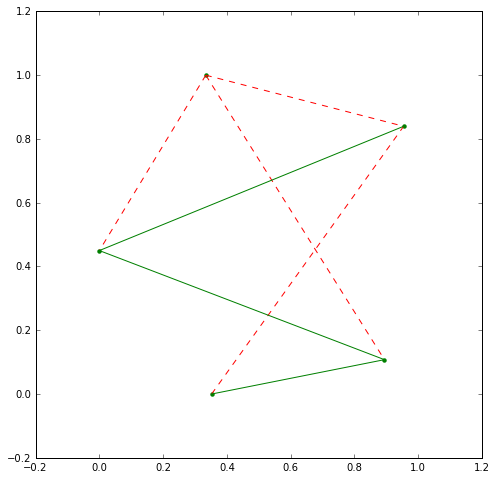

In [180]:
f, ax = plt.subplots(figsize=(8,8)) 
draw_signed_graph(unbalanced_graph_5, ax)
plt.show()

In [112]:
def is_balanced(g):
  tolerance = 1e-16
  
  J,dummy = nx.attr_matrix(g, edge_attr="sign")
  K = np.diag([ len(g.neighbors(n)) for n in g ])  
  L = K - J
#   print J
#   print L
  
  w = np.linalg.eigvals(L)

#   L = nx.laplacian_matrix(g, weight="sign") 
#   w = np.linalg.eigvals(L.todense())
  
#   print w
  
  #return min(w) == 0
  return True in np.isclose(w, 0)

print map(is_balanced, [ balanced_graph_1, balanced_graph_2, balanced_graph_3, balanced_graph_4 ] )
print map(is_balanced, [ unbalanced_graph_1, unbalanced_graph_2, unbalanced_graph_3, unbalanced_graph_4 ] )
print map(is_balanced, [ unbalanced_graph_5 ] )

[True, True, True, True]
[False, False, False, False]
[False]


In [43]:
def energy_functional(g):
  h = 0
    
  # J_ij := int(g[n1][n2]["sign"])
  # s_i  := int(g.node[n1]["s"])
  # s_j  := int(g.node[n2]["s"])

  h = 0.5 * np.sum([ 1 - int(g[n1][n2]["sign"]) * int(g.node[n1]["s"]) * int(g.node[n2]["s"]) for n1 in g for n2 in g.neighbors(n1) ])
  
  return h

# initialization of s
for n in unbalanced_graph_5:
  unbalanced_graph_5.node[n]["s"] = 1

print energy_functional(unbalanced_graph_5)

8.0


## Bibliography

- Facchetti, G., G. Iacono, and C. Altafini. 2011. “Computing Global Structural Balance in Large-Scale Signed Social Networks.”
- Harary, F. 1960. “A Matrix Criterion for Structural Balance.” Naval Research Logistics Quarterly 7(2):195–99.
- Harary, F. and J. A. Kabell. 1980. “A Simple Algorithm to Detect Balance in Signed Graphs.” Mathematical Social Sciences 1(1):131–36.
- Kunegis, J., S. Schmidt, A. Lommatzsch, and J. Lerner. 2010. “Spectral Analysis of Signed Graphs for Clustering, Prediction and Visualization..” SDM 559–70.